# Sales Data Analysis 

## 1. **Introduction**

This project involves analyzing sales transaction data to identify trends and insights. The analysis is performed using a sales dataset imported into a MySQL database and analyzed using Python libraries.

## 2. **Libraries Used**

- **Pandas**: For data manipulation and analysis.
- **Matplotlib**: For data visualization.
- **mysql.connector**: For connecting to the MySQL database and import the dataset.

## 3. **Database and Attributes**

### **Database**
- **Database Name**: `sales_db`
- **Table Name**: `sales_db`

### **Attributes**
- **RowID**: `INT` - Unique identifier for each row.
- **OrderID**: `VARCHAR(255)` - Unique identifier for each order.
- **Order Date**: `DATE` - Date when the order was placed.
- **Ship Date**: `DATE` - Date when the order was shipped.
- **Ship Mode**: `VARCHAR(255)` - Mode of shipping used for the order.
- **CustomerID**: `VARCHAR(255)` - Unique identifier for each customer.
- **Customer Name**: `VARCHAR(255)` - Name of the customer.
- **Segment**: `VARCHAR(255)` - Customer segment (e.g., Consumer, Corporate).
- **Country**: `VARCHAR(255)` - Country where the customer is located.
- **City**: `VARCHAR(255)` - City where the customer is located.
- **State**: `VARCHAR(255)` - State where the customer is located.
- **Postal Code**: `INT` - Postal code of the customer's location.
- **Region**: `VARCHAR(255)` - Region where the customer is located.
- **Product ID**: `VARCHAR(255)` - Unique identifier for each product.
- **Category**: `VARCHAR(255)` - Category of the product.
- **Sub-Category**: `VARCHAR(255)` - Sub-category of the product.
- **Product Name**: `VARCHAR(255)` - Name of the product.
- **Sales**: `FLOAT` - Sales amount for the transaction.
- **Quantity**: `INT` - Quantity of products sold in the transaction.
- **Discount**: `FLOAT` - Discount applied to the transaction.
- **Profit**: `FLOAT` - Profit earned from the transaction.

## 4. **Data Preprocessing**

1. **Import Data**: Load the dataset into a Pandas DataFrame.
2. **Convert Columns**: Convert `Order Date` and `Ship Date` columns to datetime format.

## 5. **Data Analysis**

### **5.1 Monthly Sales Trend Analysis**
- **Create Month Column**: Extract month from `Order Date` and create a new column `month`.
- **Calculate Total Sales**: Group data by `month` and calculate total sales for each month.
- **Visualization**: Plot the monthly sales trend using a line chart.

### **5.2 Sales by Ship Mode**
- **Aggregate Sales**: Group data by `Ship Mode` and sum the `Sales` for each ship mode.
- **Visualization**: Plot total sales by ship mode using a bar chart.

### **5.3 Customer Analysis**
- **Aggregate Sales by Customer**: Group data by `Customer Name` and sum the `Sales` for each customer.
- **Visualization**: Plot total sales by customer using a horizontal bar chart.
- **Distribution of Orders**: Calculate the number of orders per customer and plot the distribution using a histogram.

### **5.4 Time to Ship Analysis**
- **Calculate Shipping Time**: Compute the difference between `Ship Date` and `Order Date` in days.
- **Average Days to Ship**: Calculate the average days to ship.
- **Distribution of Shipping Time**: Plot the distribution of days to ship using a histogram.

## 6. **Conclusion**

This analysis provides insights into sales trends, customer behavior, and shipping efficiency. The visualizations help in understanding the performance of sales across different dimensions.


In [1]:
import mysql.connector
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
csv_file_path = 'C:\\Users\\HP\\Downloads\\archive (18)\\Sample - Superstore.csv'
df = pd.read_csv(csv_file_path, encoding='latin1')

In [3]:
# Convert date formats
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y').dt.strftime('%Y-%m-%d')
# Save the cleaned data to a new CSV
df.to_csv('cleaned_sales_data.csv', index=False)

In [4]:
conn = mysql.connector.connect(
    host = "localhost" , 
    user = "root",
    password = "new_password",
    database = "sales_db"
)
# Create a cursor object
cursor = conn.cursor()
print("connected successfully.")


connected successfully.


In [5]:
# Iterate over DataFrame rows to insert data into MySQL
for index, row in df.iterrows():
    sql_insert_query = """
        INSERT INTO sales_db (RowID, OrderID, OrderDate, ShipDate, ShipMode, CustomerID, CustomerName, Segment, Country, City) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    
    # Ensure column names match exactly with your DataFrame
    cursor.execute(sql_insert_query, (
        row['Row ID'], 
        row['Order ID'], 
        row['Order Date'], 
        row['Ship Date'], 
        row['Ship Mode'], 
        row['Customer ID'], 
        row['Customer Name'], 
        row['Segment'], 
        row['Country'], 
        row['City']
    ))

# Commit the transaction to save changes in the database
conn.commit()



print("Data inserted successfully into the 'sales_orders' table.")

Data inserted successfully into the 'sales_orders' table.


In [5]:
print(df.columns)

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')


#### Monthly Sales Trend

In [8]:
# Assuming 'df' is your DataFrame
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

In [12]:
df['month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('month').apply(lambda x: (x['Quantity'] * x['Sales']).sum(), include_groups=False)


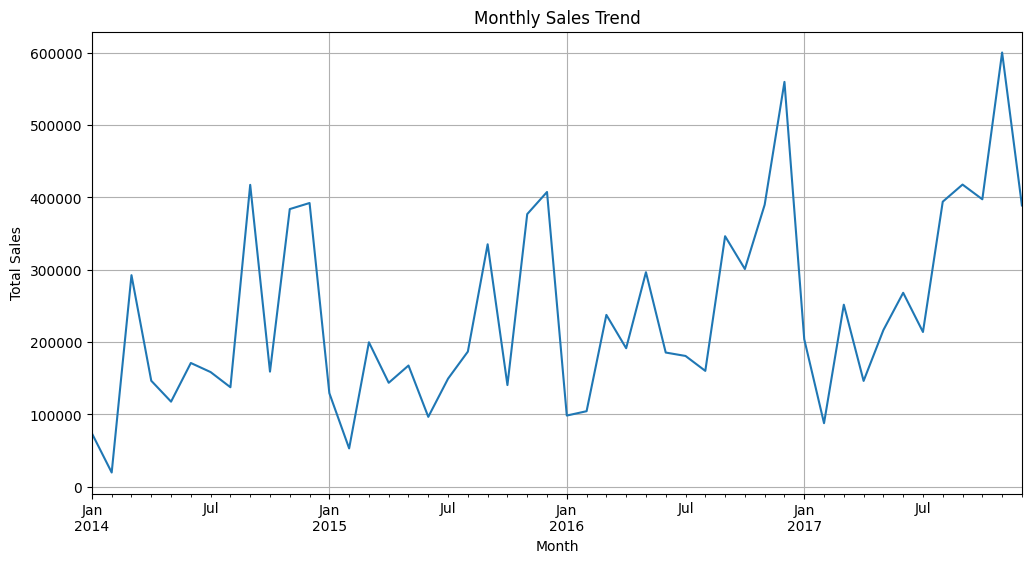

In [13]:
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### Sales by Ship Mode

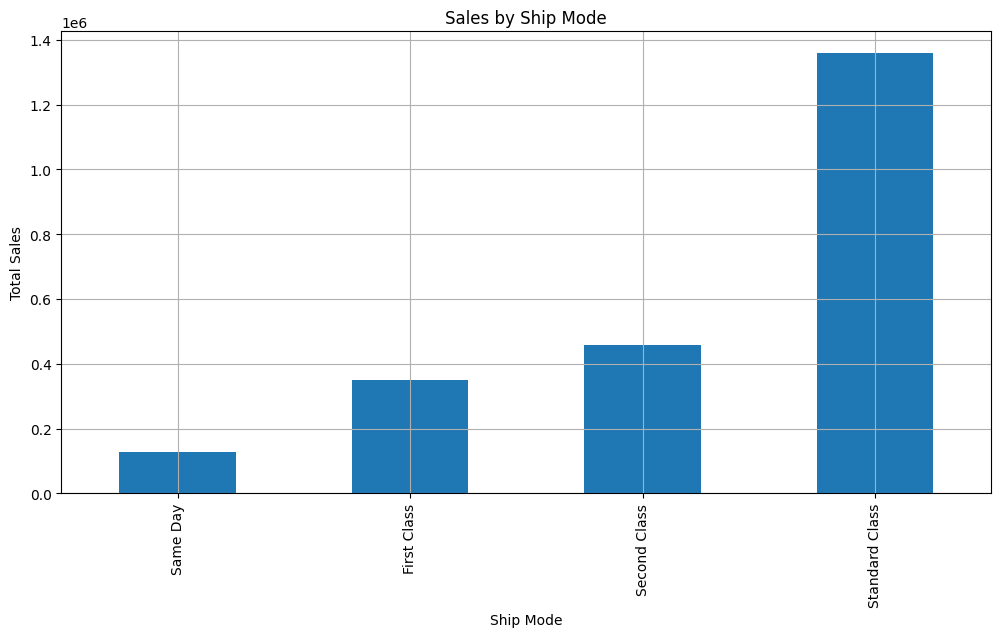

In [17]:
# Aggregate sales by ship mode
sales_by_ship_mode = df.groupby('Ship Mode').apply(lambda x: (x['Sales']).sum() , include_groups=False)

plt.figure(figsize=(12, 6))
sales_by_ship_mode.sort_values().plot(kind='bar')
plt.title('Sales by Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

#### Customer Analysis

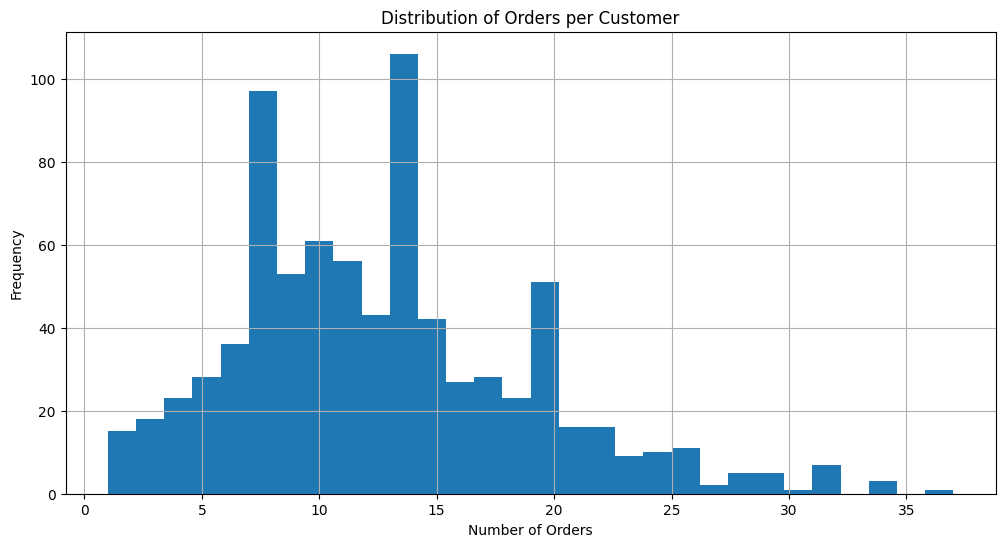

In [21]:
# Distribution of orders per customer
orders_per_customer = df.groupby('Customer Name').size()

plt.figure(figsize=(12, 6))
orders_per_customer.plot(kind='hist', bins=30)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### Time to Ship Analysis

Average Days to Ship: 3.96


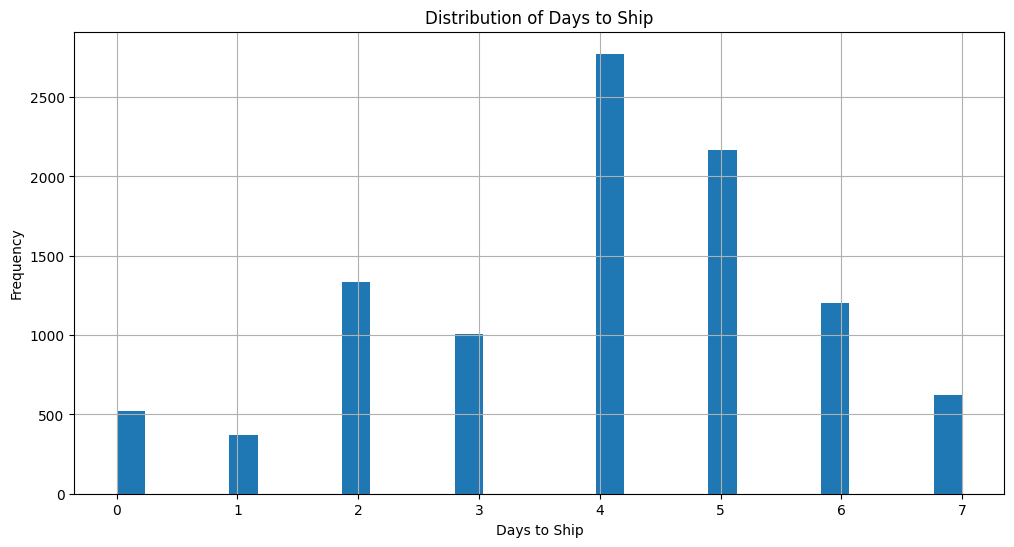

In [22]:
# Calculate time to ship in days
df['days_to_ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Average days to ship
avg_days_to_ship = df['days_to_ship'].mean()
print(f'Average Days to Ship: {avg_days_to_ship:.2f}')

# Distribution of days to ship
plt.figure(figsize=(12, 6))
df['days_to_ship'].plot(kind='hist', bins=30)
plt.title('Distribution of Days to Ship')
plt.xlabel('Days to Ship')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()